<font size="6"> **Modelling**

In this notebook, the train and test set exported from the previous notebook will be used to develop a better perfomring machine learning algorithm to predict clients with risk.\
First, an imbalanced calssification issue of the dataset was discussed, and it will be dealt in this notebook. Different types of resampling techinque will be combined with different machine learning algorithms to identify the best resampling technique for the project. After, the most suitable resmapling technique will be used on imbalanced dataset for further development.\
Also, few numbers of classifiers will be chosen for hyperparameter tuning with resampled dataset. 
Lastly, after the classifier is chosen, the feature importance will be analyzed to understand the impact of each features on predicting clients' risk.


<font size="4">1. Import packages and load data

In [30]:
import pickle

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay

In [33]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#from sklearn.pipeline import make_pipeline

In [35]:
from imblearn.pipeline import make_pipeline

In [36]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [38]:
from sklearn.base import TransformerMixin

In [39]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
pkl_file = open('X_train.pkl', 'rb')
X_train = pickle.load(pkl_file)
pkl_file.close()

In [43]:
pkl_file = open('X_test.pkl', 'rb')
X_test = pickle.load(pkl_file)
pkl_file.close()

In [44]:
pkl_file = open('y_train.pkl', 'rb')
y_train = pickle.load(pkl_file)
pkl_file.close()

In [45]:
pkl_file = open('y_test.pkl', 'rb')
y_test = pickle.load(pkl_file)
pkl_file.close()

In [46]:
df=pd.read_csv('../Capstone-3-/data.csv')

In [47]:
df

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,Job_Yrs,House_Yrs,Risk_Flag
0,1,1303834,23,3,SINGLE,RENTED,NO,MECHANICAL_ENGINEER,3,13,0
1,2,7574516,40,10,SINGLE,RENTED,NO,SOFTWARE_DEVELOPER,9,13,0
2,3,3991815,66,4,MARRIED,RENTED,NO,TECHNICAL_WRITER,4,10,0
3,4,6256451,41,2,SINGLE,RENTED,YES,SOFTWARE_DEVELOPER,2,12,1
4,5,5768871,47,11,SINGLE,RENTED,NO,CIVIL_SERVANT,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,SINGLE,RENTED,NO,SURGEON,6,11,0
251996,251997,2843572,26,10,SINGLE,RENTED,NO,ARMY_OFFICER,6,11,0
251997,251998,4522448,46,7,SINGLE,RENTED,NO,DESIGN_ENGINEER,7,12,0
251998,251999,6507128,45,0,SINGLE,RENTED,NO,GRAPHIC_DESIGNER,0,10,0


In [48]:
X_train.shape

(176400, 63)

In [49]:
y_train.shape 

(176400, 1)

<font size="4">2.Dealing with imbalanced dataset

Dictionary with different resampling techinques inclduing oversampling, and undersampling and another dictionary with different classifiers are created to find the best perfroming resampling techniques for the model.

In [50]:
resamplers={}
resamplers['SMOTE']=SMOTE()
resamplers['AD']=ADASYN()
resamplers['Random under Sampler']=RandomUnderSampler()
resamplers['Random over Sampler']=RandomOverSampler()
resamplers['TomekLinks']=TomekLinks()

In [51]:
classifiers = {}
classifiers['LR'] = LogisticRegression()
classifiers['DT'] = DecisionTreeClassifier()
classifiers['RF'] = RandomForestClassifier()
classifiers['KNN'] = KNeighborsClassifier()
classifiers['LGBM'] = LGBMClassifier()
classifiers['XGB'] = xgb.XGBClassifier(objective="binary:logistic", use_label_encoder=False, eval_metric='logloss')

Classification Report, Accuracy score and Area under the curve were calculated and stored for evaluation.

In [52]:
scores = {}
cls_report= {}
scores['Accuracy'] = pd.DataFrame(columns=classifiers.keys(), index=resamplers.keys())
scores['AUC'] = pd.DataFrame(columns=classifiers.keys(), index=resamplers.keys())

In [53]:
for model in classifiers.keys():
    for resampler in resamplers.keys():
        pipe = make_pipeline(resamplers[resampler], classifiers[model])
        pipe.fit(X_train, y_train)
        scores['Accuracy'].loc[resampler,model] = pipe.score(X_test, y_test)
        scores['AUC'].loc[resampler,model] = roc_auc_score(y_test, pipe.predict(X_test))
        cls_report[resampler,model]=classification_report(y_test, pipe.predict(X_test))

Classification Report of each classifer and resampling technique combinations are plotted.

In [56]:
for key, value in cls_report.items():
...     print(key,'\n', value)

('SMOTE', 'LR') 
               precision    recall  f1-score   support

           0       0.89      0.64      0.75     66301
           1       0.15      0.45      0.22      9299

    accuracy                           0.62     75600
   macro avg       0.52      0.55      0.49     75600
weighted avg       0.80      0.62      0.68     75600

('AD', 'LR') 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84     66301
           1       0.15      0.24      0.18      9299

    accuracy                           0.74     75600
   macro avg       0.52      0.52      0.51     75600
weighted avg       0.79      0.74      0.76     75600

('Random under Sampler', 'LR') 
               precision    recall  f1-score   support

           0       0.89      0.52      0.66     66301
           1       0.14      0.56      0.23      9299

    accuracy                           0.52     75600
   macro avg       0.52      0.54      0.44     75600
weighted

In [280]:
scores['Accuracy']

,LR,DT,RF,KNN,LGBM,XGB
SMOTE,0.618995,0.871019,0.887646,0.851415,0.760767,0.839974
AD,0.738532,0.87254,0.886799,0.847288,0.813638,0.85295
Random under Sampler,0.52336,0.848161,0.874339,0.829167,0.744841,0.799286
Random over Sampler,0.525013,0.877487,0.893889,0.862831,0.762487,0.821548
TomekLinks,0.876997,0.881905,0.89914,0.887804,0.878161,0.885397


In [55]:
scores['AUC']

,LR,DT,RF,KNN,LGBM,XGB
SMOTE,0.545722,0.85495,0.843395,0.860277,0.73967,0.799389
AD,0.523868,0.852673,0.845409,0.85515,0.716512,0.776185
Random under Sampler,0.540754,0.85477,0.848105,0.828731,0.740021,0.807257
Random over Sampler,0.542205,0.848837,0.84261,0.855413,0.741852,0.806728
TomekLinks,0.5,0.751781,0.74834,0.728194,0.506997,0.564608


As showm above, the SMOTE resampling technique from oversampler performed well through out the whole classifiers therefore, SMOTE resampler will be used to deal with the imbalanced classification of the dataset.

SMTOE will be used to resample the training sets of our model.

In [20]:
sm=SMOTE()
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

New train and test sets are prepared with SMOTE resmapling technique for future use.

<font size="4">3.Hyperparameter Tuning

Next, list of classifiers chosen from scores above with different parameters for each classifiers are created and for loop that creates pipeline and does randomized search for each classifier is developed.

RandomziedsearchCV was used for the hyperparameter tuning to save time and also recall score was prioritized for our project to minimize the number of False Negatives. It is crucial for clients when they think they will be approved for loan application but getting rejected then it causes more time and money. Therefore it was important for our models to minimize the number of false positive and maximize the True positives.

In [25]:
names = [
        "Logistic Regression",
         "RandomForestClassifier",
         "LGBMClassifier",
         "XGBClassifier"
        ]

classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    LGBMClassifier(),
    xgb.XGBClassifier(objective="binary:logistic", use_label_encoder=False, eval_metric='logloss')
    
]

parameters = [
              {"clf__penalty": ['l2','l1'],
               "clf__C": np.logspace(0,1, 4, 10)}, #logistic regression
              {'clf__n_estimators':[100,1000],
               'clf__max_depth':[0,4,5,6,8],
               'clf__criterion':['gini','entropy'],
               'clf__max_features':['sqrt', 'log2', None],
               'clf__min_samples_split':[1,2,3]}, #Random Forest
              {'clf__learning_rate': [0.1,0.01,0.0001],
               'clf__num_leaves': [31,140,200],
               'clf__boosting_type' : ['gbdt'],
               'clf__objective' : [None,'binary'],
               'clf__max_depth' : [-1,5,7]},#LGBM
              {'clf__max_depth': [3, 6, 10],
               'clf__learning_rate': [0.1, 0.2, 0.3],
               'clf__subsample': np.arange(0.6, 0.8, 1.0),
              'clf__n_estimators': [100, 500, 1000],}#xgb
              ]

for name, classifier, params in zip(names, classifiers, parameters):
    clf_pipe = Pipeline([('clf', classifier)])
    gs_clf = RandomizedSearchCV(clf_pipe, param_distributions=params, n_jobs=None,scoring='recall')
    clf = gs_clf.fit(X_train_sm, y_train_sm)
    score = clf.score(X_test, y_test)
    best_param=clf.best_params_
    roc_score=roc_auc_score(y_test, gs_clf.predict(X_test))
    cls_report=classification_report(y_test, gs_clf.predict(X_test))
    print("{} accuracy score: {}".format(name, score))
    print("{} best parameters: {}".format(name,best_param))
    print("{} roc_auc: {}".format(name,roc_score))
    print("{} confusion matrix: {}".format(name,cls_report))

Logistic Regression accuracy score: 0.43821916335089794
Logistic Regression best parameters: {'clf__penalty': 'l2', 'clf__C': 1.0}
Logistic Regression roc_auc: 0.5429885578598201
Logistic Regression confusion matrix:               precision    recall  f1-score   support

           0       0.89      0.65      0.75     66301
           1       0.15      0.44      0.22      9299

    accuracy                           0.62     75600
   macro avg       0.52      0.54      0.49     75600
weighted avg       0.80      0.62      0.69     75600

RandomForestClassifier accuracy score: 0.596945908162168
RandomForestClassifier best parameters: {'clf__n_estimators': 1000, 'clf__min_samples_split': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': 8, 'clf__criterion': 'entropy'}
RandomForestClassifier roc_auc: 0.6331737881559848
RandomForestClassifier confusion matrix:               precision    recall  f1-score   support

           0       0.92      0.67      0.78     66301
           1       0.2

Classification report of each classifiers with best parameters are plotted. As it was mentioned above, recall score was optimized with the hyperparameters. The classifiers with parameter tuned performed better in terms of obtaining recall score compare to the classifiers with default parameters.

In [70]:
lr_best=LogisticRegression(penalty='l2', C= 1.0)
lr_best.fit(X_train_sm,y_train_sm)
lrpred=lr_best.predict(X_test)

In [359]:
RF_tuned=RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 'sqrt',max_depth= 8, criterion= 'entropy')
RF_tuned.fit(X_train_sm,y_train_sm)
RFpred=RF_tuned.predict(X_test)

In [355]:
lgbm_best=LGBMClassifier(clf__objective= None, clf__num_leaves= 200, clf__max_depth= -1, clf__learning_rate= 0.1, clf__boosting_type= 'gbdt')
lgbm_best.fit(X_train_sm,y_train_sm)
lgbmpred=lgbm_best.predict(X_test)

[LightGBM] [Warning] Unknown parameter: clf__max_depth
[LightGBM] [Warning] Unknown parameter: clf__num_leaves
[LightGBM] [Warning] Unknown parameter: clf__learning_rate
[LightGBM] [Warning] Unknown parameter: clf__boosting_type


In [358]:
best_xgb=xgb.XGBClassifier(objective="binary:logistic", use_label_encoder=False, eval_metric='logloss',subsample=0.6, n_estimators= 1000, max_depth= 10, learning_rate = 0.2)
best_xgb.fit(X_train_sm,y_train_sm)
xgbpred=best_xgb.predict(X_test)

In [360]:
pipe_dict = {0: 'Logistic Regression', 1: 'RandomForest', 2: 'LGBM',3:'XGBoost'}
fit_best=[lr_best,RF_tuned,lgbm_best,best_xgb]
result_best=[lrpred,RFpred,lgbmpred,xgbpred]

Accuracy scores are calculated for each classifiers with best estimators. The numbers may be lower than classifiers with default parameters. However, hyperparameter tuning was conducted with recall score prioritized to minimize the false negatives.

Also, confusion matrix and roc-auc are plotted for further evaluation.

In [367]:
for i,result in enumerate(fit_best):
    print(pipe_dict[i],result.score(X_test, y_test))

Logistic Regression 0.621984126984127
RandomForest 0.6502777777777777
LGBM 0.7491931216931217
XGBoost 0.8913359788359788


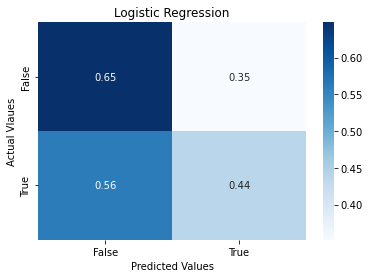

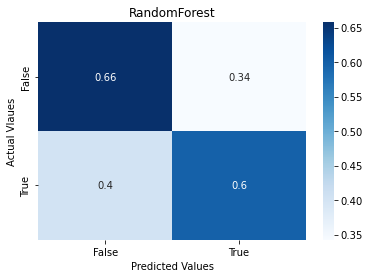

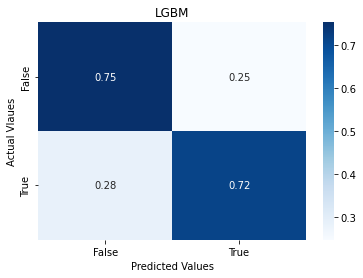

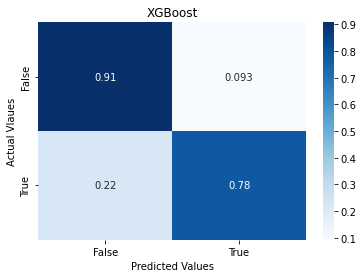

In [361]:
for i,result in enumerate(result_best):    
    cmn = confusion_matrix(y_test,result).astype('float') / confusion_matrix(y_test,result).sum(axis=1)[:, np.newaxis]
    _=sns.heatmap(cmn,annot=True,cmap='Blues')
    _.set_title(pipe_dict[i])
    _.set_xlabel('Predicted Values')
    _.set_ylabel('Actual Vlaues')
    _.xaxis.set_ticklabels(['False','True'])
    _.yaxis.set_ticklabels(['False','True'])
    plt.show()

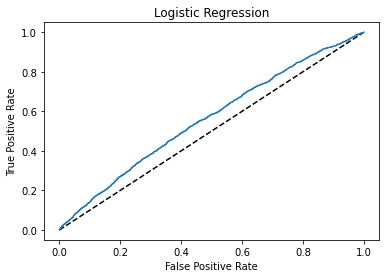

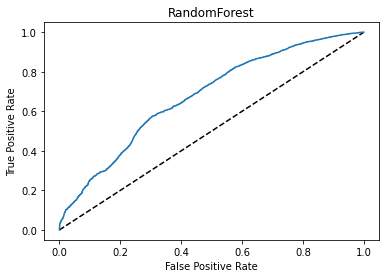

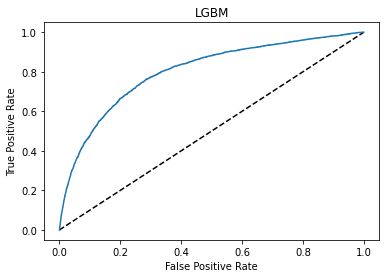

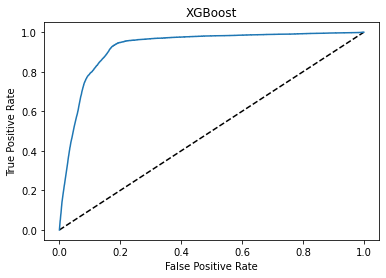

In [362]:
for i,result in enumerate(fit_best):
    y_scores=result.predict_proba(X_test)[:,1]
    f_lr,t_lr,_=roc_curve(y_test,y_scores)
    roc_auc=auc(f_lr,t_lr)
    round(roc_auc,2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(f_lr, t_lr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(pipe_dict[i])
    plt.show()

As both the confusion matrix and ROC-AUC shows, XGBOOST performed the best compare to Logistic Regression, RandomForest and LGBM classifier with 89.13 percent accuracy score, 0.093 of flase positive and 84.23 percent of ROC-AUC.

<font size="4">4. Interpretability and Feature Importance

Feature importance of the models are calculated for three different model algorithms inclduing Logistic Regression, RandomForest and XGBoost classifier.

First is using logistici regression coefficient. The coefficient of each columns are calculated.

In [182]:
lr_best.coef_

array([[-0.01642924, -0.07711201, -0.15656133,  0.04906543, -0.01652422,
        -3.43220326, -3.03832122, -2.94093921, -3.04008936, -2.43589013,
        -3.55132075, -3.77206301, -4.68576972, -4.85677949, -4.66994505,
        -4.46380422, -4.75460402, -4.6590422 , -4.73863638, -4.51708962,
        -4.85106651, -4.86022059, -4.67960823, -4.74593581, -4.74285202,
        -4.69562451, -4.66995368, -4.78942482, -4.95002619, -4.88287076,
        -4.96051252, -4.80944052, -5.09253468, -4.83503197, -4.73919699,
        -4.84760175, -4.62586004, -4.83746612, -4.50887759, -4.84022799,
        -4.57105808, -5.020327  , -4.67486787, -4.92621491, -4.80180041,
        -4.90033725, -4.78689533, -4.69089832, -5.23476477, -4.74841693,
        -4.42283402, -4.93815581, -4.80666344, -4.50603646, -4.67582267,
        -4.5431922 , -4.80845006, -4.8431891 , -4.48588871, -4.6396887 ,
        -4.67094025, -5.40321639, -4.86751286]])

In [172]:
feature_importance = abs(lr_best.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())


The array was converted to dataframe with column names and a function that sums up the values of the same categories was defined.

In [166]:
summed=pd.DataFrame([feature_importance],columns=X_train_sm.columns)

In [164]:
summed

,Income,Age,Experience,Job_Yrs,House_Yrs,Marital_Status_MARRIED,Marital_Status_SINGLE,House_Ownership_NORENT_NOOWN,House_Ownership_OWNED,House_Ownership_RENTED,...,Profession_SCIENTIST,Profession_SECRETARY,Profession_SOFTWARE_DEVELOPER,Profession_STATISTICIAN,Profession_SURGEON,Profession_SURVEYOR,Profession_TECHNICAL_WRITER,Profession_TECHNICIAN,Profession_TECHNOLOGY_SPECIALIST,Profession_WEB_DESIGNER
0,0.304064,1.42715,2.897558,0.908078,0.305822,63.521484,56.231715,54.429418,56.264438,45.082224,...,83.395447,86.537764,84.083107,88.992365,89.635298,83.022563,85.869015,86.447403,100.0,90.08547


In [168]:
from __future__ import print_function

import pandas as pd

categories = set(df.columns)

def correct_categories(cols):
    return [cat for col in cols for cat in categories if col.startswith(cat)]    

all_summed=summed.groupby(correct_categories(summed.columns),axis=1).sum()

In [189]:
all_summed=all_summed.T

In [194]:
all_summed.rename(columns = {0:'Feature importance'}, inplace = True)

<AxesSubplot:>

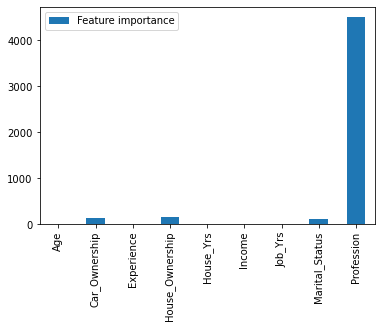

In [195]:
all_summed.plot(kind='bar')

The feature importance using logistic Regression was plotted above, as it shows, profession was the most important feature when developing a model using logistic regression algorithm. However, since logistic regression model performed the worst out of the four classifiers, the further analyze of the feature importance was necessary.

The next classifier used was RandomForest Classifier. Feature importances function from the RandomForest classifier was used to obtain an array of values for all the columns. Again, the defined function was used to add all the values within the same category to analyze the feature importance.

In [238]:
importances=RF_tuned.feature_importances_
importances

array([0.12552327, 0.13462847, 0.15758949, 0.14801482, 0.05756193,
       0.02214915, 0.01531725, 0.01418107, 0.02667712, 0.02219566,
       0.0206457 , 0.0242789 , 0.00261394, 0.00282135, 0.00469857,
       0.00293089, 0.00163777, 0.00244628, 0.00226323, 0.00437284,
       0.00218422, 0.00665353, 0.00191357, 0.0017345 , 0.00886589,
       0.00312074, 0.00448968, 0.00245977, 0.01201214, 0.0022334 ,
       0.00377662, 0.0081913 , 0.01398076, 0.00321404, 0.00340518,
       0.00406228, 0.00152281, 0.00455028, 0.00205364, 0.00492396,
       0.00155798, 0.00521374, 0.00187706, 0.00412154, 0.00136416,
       0.00385288, 0.00269922, 0.0006514 , 0.01720589, 0.00706603,
       0.00406568, 0.00640081, 0.00409054, 0.00252333, 0.0013794 ,
       0.00221686, 0.00433237, 0.00421619, 0.00260338, 0.00698493,
       0.00338909, 0.01816718, 0.00612435])

In [239]:
std = np.std([tree.feature_importances_ for tree in RF_tuned.estimators_], axis=0)

In [240]:
std1=pd.Series(std,index=X_train_sm.columns)


In [246]:
std1

Income                              0.046147
Age                                 0.050838
Experience                          0.076440
Job_Yrs                             0.072226
House_Yrs                           0.040549
                                      ...   
Profession_SURVEYOR                 0.005400
Profession_TECHNICAL_WRITER         0.012187
Profession_TECHNICIAN               0.005563
Profession_TECHNOLOGY_SPECIALIST    0.017151
Profession_WEB_DESIGNER             0.010202
Length: 63, dtype: float64

In [253]:
std1=pd.DataFrame(std1).T

In [255]:
std1=std1.groupby(correct_categories(summed.columns),axis=1).sum()

In [264]:
series_std = std1.squeeze()

In [265]:
series_std

Age                0.050838
Car_Ownership      0.029396
Experience         0.076440
House_Ownership    0.057317
House_Yrs          0.040549
Income             0.046147
Job_Yrs            0.072226
Marital_Status     0.028669
Profession         0.365435
Name: 0, dtype: float64

In [260]:
forest_importances = pd.Series(importances, index=X_train_sm.columns)

In [203]:
forest_importances1=forest_importances.sort_values(ascending=False).head(9)

In [261]:
summed_RF=pd.DataFrame(forest_importances).T

In [262]:
all_summed_RF=summed_RF.groupby(correct_categories(summed.columns),axis=1).sum()

In [263]:
all_summed_RF

,Age,Car_Ownership,Experience,House_Ownership,House_Yrs,Income,Job_Yrs,Marital_Status,Profession
0,0.134628,0.044925,0.157589,0.063054,0.057562,0.125523,0.148015,0.037466,0.231237


In [266]:
series_summed=all_summed_RF.squeeze()

In [267]:
series_summed

Age                0.134628
Car_Ownership      0.044925
Experience         0.157589
House_Ownership    0.063054
House_Yrs          0.057562
Income             0.125523
Job_Yrs            0.148015
Marital_Status     0.037466
Profession         0.231237
Name: 0, dtype: float64

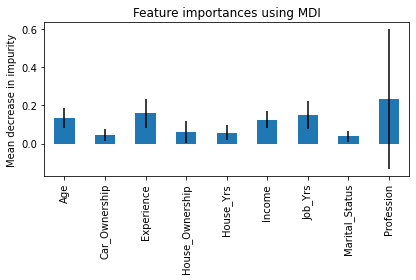

In [268]:
fig, ax = plt.subplots()
series_summed.plot.bar(yerr=series_std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

As the plot shows above, again, 'Profession' was the most important feature to develop a RandomForest Classifier model. However, for RandomForest classifier, the standard deveiation of the profession was very large and, experience, job years, age and income are also important feature in developing a model. 

In [270]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [271]:
import shap

Lastly, the best performing model out of the three XGBoost Classifier's feature importance was analyzed using SHAP summary plots. 

In [281]:
explainer = shap.TreeExplainer(best_xgb)

In [283]:
shap_values = explainer.shap_values(X_test)

In [326]:
shap_values

array([[-1.0136036e+00, -1.4436549e+00, -1.2759863e+00, ...,
         6.4022809e-02,  4.3654792e-02,  5.8904361e-02],
       [-1.3406674e+00, -9.5991594e-01, -4.6579072e-01, ...,
         3.6136638e-02,  2.2729466e-02,  6.6715792e-02],
       [-1.0594140e+00, -1.1428602e+00, -4.4568536e-01, ...,
         2.5661208e-02,  3.0876860e-02, -3.3122125e+00],
       ...,
       [ 6.6644925e-01, -9.2059016e-02,  5.8657533e-01, ...,
         5.7781368e-02,  2.5303457e-02,  5.1376205e-02],
       [-9.0192306e-01, -8.2837385e-01, -1.0589851e+00, ...,
        -1.6682068e-03,  2.4832133e-02,  2.0605311e-02],
       [-1.7743806e+00, -5.8226204e-01, -7.6227993e-02, ...,
         4.3572918e-02,  4.0220257e-02,  5.9625633e-02]], dtype=float32)

In [338]:
shap_values_=pd.DataFrame(shap_values,columns=X_train_sm.columns)

In [339]:
shap_values_=shap_values_.groupby(correct_categories(summed.columns),axis=1).sum()

In [340]:
shap_values_=pd.DataFrame.to_numpy(shap_values_)

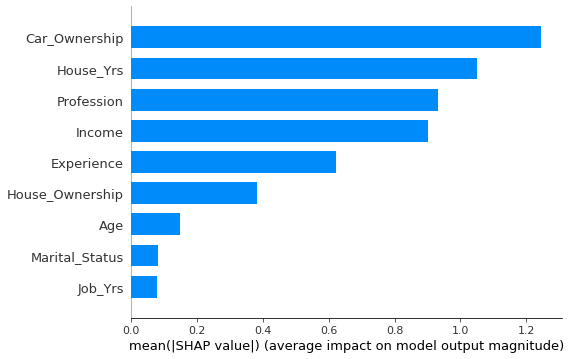

In [345]:
shap.summary_plot(shap_values_, X_test_, plot_type="bar", feature_names = X_test_.columns)

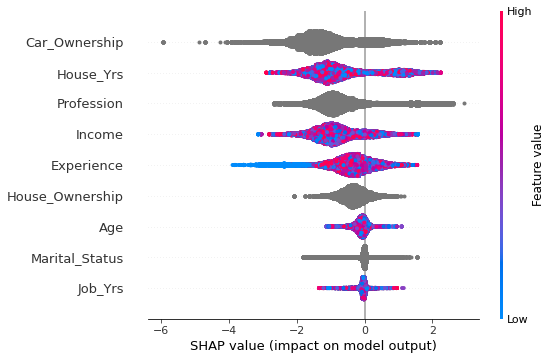

In [346]:
shap.summary_plot(shap_values_,X_test_,max_display=X_test_.shape[1])

The summary plots show interesting trends compare to other models' feature importance, on predicting Risk of Loan. The top 3 features those are most important are Car ownership, House years and Profession. 